<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="5"> DSO 545- Homework 5 </p> </b></font>

<p style="text-align: center;"> <b> Fall 2020 </b> </p>


## <span style="color:blue">  Gordon Lau </span>

## <span style="color:firebrick">  Assignment Learning Objectives </span>



- Customize seaborn plots in Python
- Deal with date variables in Python
- Wrangle data in Python

## <span style="color:firebrick"> Dataset </span>

The dataset consists of 3 variables:
    
|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`date`| date of the poll
|`approval`| President's Trump approval rating
|`disapproval`| President's Trump disapproval rating



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trump = pd.read_csv('TrumpRatings.csv', parse_dates = ['date'])

In [24]:
trump.head()

,date,approve,disapprove
0,2017-01-22,45.00,45.000000
1,2017-01-23,45.00,46.000000
2,2017-01-24,44.05,45.100000
3,2017-01-25,43.10,41.933333
4,2017-01-26,43.80,47.200000


In [25]:
trump['date2'] = pd.to_datetime(trump['date'])
trump.head()

,date,approve,disapprove,diff,month,year,date2
0,2017-01-22,45.00,45.000000,0.000000,1,2017,2017-01-22
1,2017-01-23,45.00,46.000000,1.000000,1,2017,2017-01-23
2,2017-01-24,44.05,45.100000,1.050000,1,2017,2017-01-24
3,2017-01-25,43.10,41.933333,-1.166667,1,2017,2017-01-25
4,2017-01-26,43.80,47.200000,3.400000,1,2017,2017-01-26


## <span style="color:firebrick"> Questions </span>


#### 1. Create an EXACT copy of the following graph that shows  Persident's Trump daily approval ratings.

- Each of the red horizontal lines represent the annual average approval ratings in 2017, 2018, 2019, and 2020 respectively
- The line chart is grey in color with alpha = 0.3
- The figure size is 10 x 5



<Figure size 720x360 with 0 Axes>

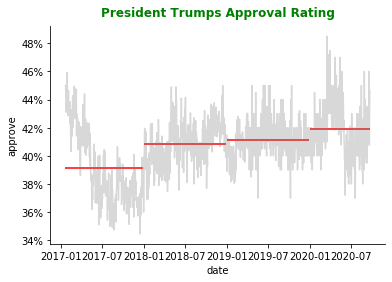

<Figure size 720x360 with 0 Axes>

In [50]:
graph= sns.lineplot(x=trump['date'], y=trump['approve'],color = 'grey',alpha = 0.3)

#Add Title
plt.title('President Trumps Approval Rating', fontweight = 'bold',color='green', pad = 10)

#Add % to y label
ytickpositions = []
for i in range(34,50,2):
    ytickpositions.append(i)

yticklabels = []
for i in range(34,50,2):
    yticklabels.append(f'{i}'+'%')
    
plt.yticks(ytickpositions,yticklabels)


#Red Horizontal Lines
for i in range(0,len(avg_per_year)):
    graph.hlines(y=avg_per_year.iloc[i,1], xmin=minmax.iloc[i,0],xmax = minmax.iloc[i,1],color = 'red')

#Remove Spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figure(figsize = (10,5))

In [47]:
trump['year'] = trump['date'].dt.year

avg_per_year = trump.groupby('year').agg({'approve':'mean'}).reset_index()

minmax = trump['date'].groupby(trump['date'].dt.year).agg(['min','max'])
minmax

,min,max
date,,
2017,2017-01-22,2017-12-31
2018,2018-01-01,2018-12-31
2019,2019-01-01,2019-12-31
2020,2020-01-01,2020-09-22


#### 2. Create an EXACT copy of the following graph that shows the average monthy difference between Persident's Trump approval and disapproval ratings (Disapproval% - Approval%) since he took office in 2017.

- The span area is green colored with alpha = 0.3
- The 2017, 2018, and 2019 lines are grey with alpha = 0.3
- The 2020 line is red
- The annotation text fontsize for the years is 10
- The figure size is 10 x 5



In [3]:
trump.head()

,date,approve,disapprove
0,2017-01-22,45.00,45.000000
1,2017-01-23,45.00,46.000000
2,2017-01-24,44.05,45.100000
3,2017-01-25,43.10,41.933333
4,2017-01-26,43.80,47.200000


In [136]:
trump2 = trump
trump2['diff'] = trump2['disapprove'] - trump2['approve']
trump2['month'] = trump2['date'].dt.month
trump2['year'] = trump2['date'].dt.year

ratingsdiff = trump2.groupby(['year','month']).agg({'diff':'mean'}).reset_index()
year2017 = trump2.loc[trump['year']==2017].groupby('month').agg({'diff':'mean'})
year2018 = trump2.loc[trump['year']==2018].groupby('month').agg({'diff':'mean'})
year2019 = trump2.loc[trump['year']==2019].groupby('month').agg({'diff':'mean'})
year2020 = trump2.loc[trump['year']==2020].groupby('month').agg({'diff':'mean'})

<Figure size 720x360 with 0 Axes>

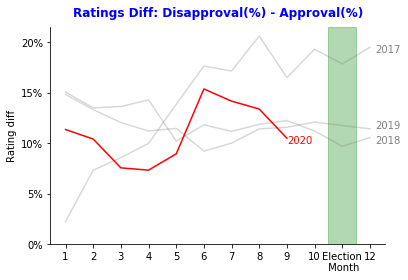

<Figure size 720x360 with 0 Axes>

In [174]:
plt.plot(year2017, color='grey',alpha=0.3)
plt.plot(year2018, color='grey',alpha=0.3)
plt.plot(year2019, color='grey',alpha=0.3)
plt.plot(year2020, color='red')
#Add Title
plt.title('Ratings Diff: Disapproval(%) - Approval(%)', fontweight = 'bold',color='blue', pad = 10)

#Add % to y label
ytickpositions = []
for i in range(0,25,5):
    ytickpositions.append(i)

yticklabels = []
for i in range(0,25,5):
    yticklabels.append(f'{i}'+'%')
    
plt.yticks(ytickpositions,yticklabels)

plt.ylabel('Rating diff')

#Redo x positions
xtickpositions = []
for i in range(1,13,1):
    xtickpositions.append(i)

xticklabels = [1,2,3,4,5,6,7,8,9,10,'Election\n Month',12]
    
plt.xticks(xtickpositions,xticklabels)

#Annotate
plt.annotate('2017',(12.2,19),color = 'grey', fontsize = 10)
plt.annotate('2018',(12.2,10),color = 'grey',fontsize = 10)
plt.annotate('2019',(12.2,11.5),color = 'grey',fontsize = 10)
plt.annotate('2020',(9,10),color = 'red',fontsize = 10)

#Remove Spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Create span area
plt.axvspan(10.5,11.5,color = 'green',alpha = 0.3)

plt.figure(figsize = (10,5))

In [148]:
xtickpositions

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]